In [35]:
import pandas as pd


In [36]:
import numpy as np

In [37]:
np.random.seed(42)

In [38]:
employee_ids = [f"EMP_{i:03d}"for i in range(1,31)]

In [39]:
dates = pd.date_range("2025-07-01",periods=30,freq="D")

In [40]:
employee_ids

['EMP_001',
 'EMP_002',
 'EMP_003',
 'EMP_004',
 'EMP_005',
 'EMP_006',
 'EMP_007',
 'EMP_008',
 'EMP_009',
 'EMP_010',
 'EMP_011',
 'EMP_012',
 'EMP_013',
 'EMP_014',
 'EMP_015',
 'EMP_016',
 'EMP_017',
 'EMP_018',
 'EMP_019',
 'EMP_020',
 'EMP_021',
 'EMP_022',
 'EMP_023',
 'EMP_024',
 'EMP_025',
 'EMP_026',
 'EMP_027',
 'EMP_028',
 'EMP_029',
 'EMP_030']

In [41]:
data = {
    "Date":np.tile(dates,len(employee_ids)),
    "Employee_ID":np.repeat(employee_ids,len(dates)),
    "Working_Hours":np.random.uniform(4,10,size=len(employee_ids)*len(dates)).round(2)
}

In [42]:
df = pd.DataFrame(data)

In [43]:
df.to_csv("employee_working_hours.csv", index=False)

In [44]:
df_csv = pd.read_csv("employee_working_hours.csv")

In [45]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           6.25
1  2025-07-02     EMP_001           9.70
2  2025-07-03     EMP_001           8.39
3  2025-07-04     EMP_001           7.59
4  2025-07-05     EMP_001           4.94
       Working_Hours
count     900.000000
mean        6.954233
std         1.762088
min         4.030000
25%         5.387500
50%         7.010000
75%         8.490000
max        10.000000
30


In [46]:
total_hours=df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)


In [47]:
avg_daily = df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [51]:
threshold_low = 5
threshold_high = 9

df_csv["Low_Hours_Flag"] = df_csv["Working_Hours"] < threshold_low
df_csv["High_Hours_Flag"] = df_csv["Working_Hours"] > threshold_high

# Display rows where working hours are too low or too high
print(df_csv[df_csv["Low_Hours_Flag"] | df_csv["High_Hours_Flag"]].head())


         Date Employee_ID  Working_Hours  Low_Hours_Flag  High_Hours_Flag
1  2025-07-02     EMP_001           9.70           False             True
4  2025-07-05     EMP_001           4.94            True            False
5  2025-07-06     EMP_001           4.94            True            False
6  2025-07-07     EMP_001           4.35            True            False
7  2025-07-08     EMP_001           9.20           False             True


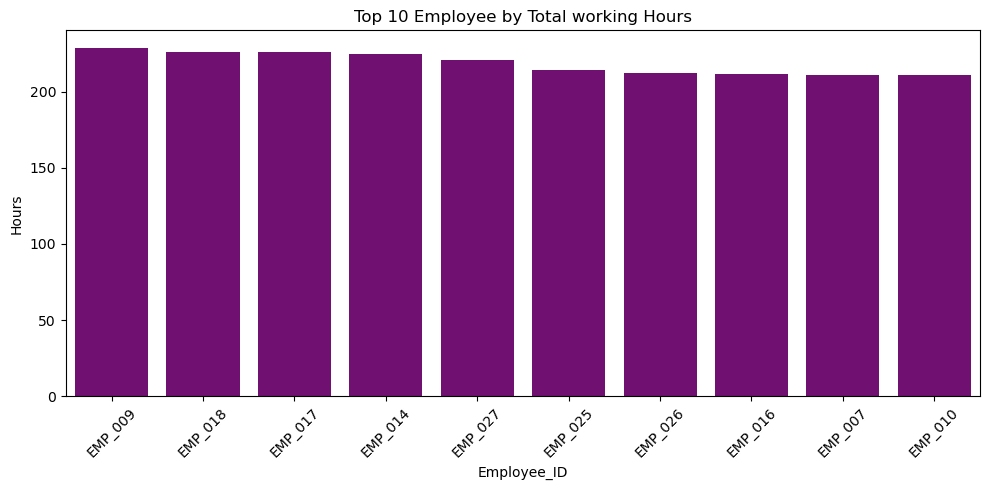

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
top10 = total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index,y=top10.values,color='purple')
plt.xticks(rotation=45)
plt.title("Top 10 Employee by Total working Hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

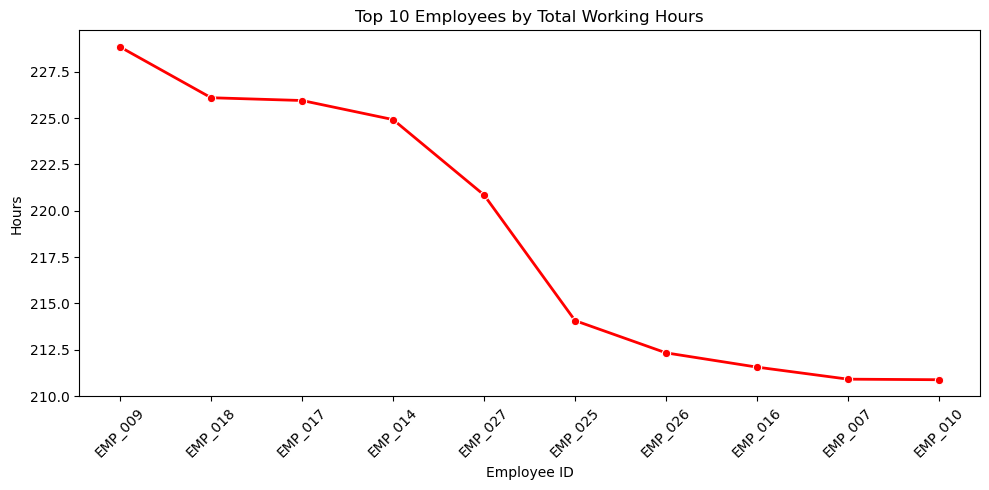

In [56]:
plt.figure(figsize=(10,5))
sns.lineplot(x=top10.index, y=top10.values, marker='o', linewidth=2, color='red')
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total Working Hours")
plt.ylabel("Hours")
plt.xlabel("Employee ID")
plt.tight_layout()
plt.show()

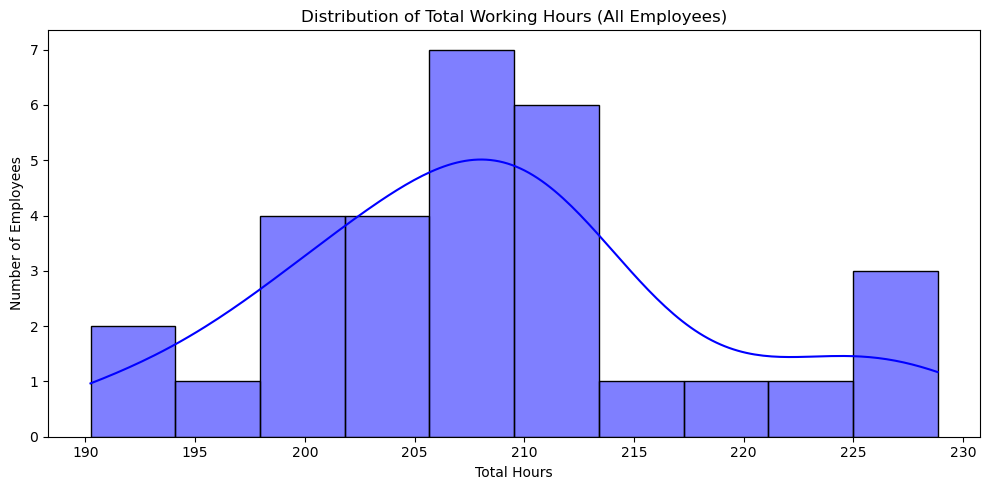

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(total_hours, bins=10, kde=True, color='blue')
plt.title("Distribution of Total Working Hours (All Employees)")
plt.xlabel("Total Hours")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()
